In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import mediapipe as mp

In [10]:

mp_pose = mp.solutions.pose
pose_image = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.7,min_tracking_confidence=0.7)

# Initialize mediapipe drawing class - to draw the landmarks points.
mp_drawing = mp.solutions.drawing_utils

In [11]:
def detectPose(image_pose, pose, draw=False, display=False):
    
    original_image = image_pose.copy()
    image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)
    resultant = pose.process(image_in_RGB)
    if resultant.pose_landmarks and draw:    
        mp_drawing.draw_landmarks(image=original_image, landmark_list=resultant.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS,
                                  landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255,255,255),
                                                                               thickness=3, circle_radius=3),
                                  connection_drawing_spec=mp_drawing.DrawingSpec(color=(49,125,237),
                                                                               thickness=2, circle_radius=2))

    if display:
            
            plt.figure(figsize=[22,22])
            plt.subplot(121);plt.imshow(image_pose[:,:,::-1]);plt.title("Input Image");plt.axis('off');
            plt.subplot(122);plt.imshow(original_image[:,:,::-1]);plt.title("Pose detected Image");plt.axis('off');
    
    else:
        pose_ = np.array(([[res.x,res.y,res.z,res.visibility] for res in resultant.pose_landmarks.landmark] )).flatten() if resultant.pose_landmarks else np.zeros(1404) 
        return np.concatenate([pose_])

array([ 0.37562376,  0.17245534, -0.20548801,  0.99993205,  0.37379989,
        0.1630798 , -0.18439282,  0.99990916,  0.37501976,  0.16268429,
       -0.1844375 ,  0.99988413,  0.37606367,  0.16220291, -0.18446666,
        0.99991071,  0.36647967,  0.16369151, -0.19651996,  0.99989223,
        0.36246866,  0.16399738, -0.1965761 ,  0.99986374,  0.35800916,
        0.16445719, -0.19664377,  0.99991262,  0.36916643,  0.16481256,
       -0.05628654,  0.99967694,  0.34399053,  0.16896832, -0.11176403,
        0.99993372,  0.37687328,  0.18171524, -0.15610389,  0.99991393,
        0.36894912,  0.18320021, -0.17228977,  0.99988329,  0.40380913,
        0.22263512,  0.01383252,  0.99940932,  0.3140851 ,  0.22602563,
       -0.06166165,  0.99872226,  0.4461239 ,  0.28630257, -0.11864968,
        0.82797998,  0.32291821,  0.29856357, -0.12276275,  0.93383592,
        0.39815378,  0.25071958, -0.34755006,  0.78483528,  0.38431045,
        0.25380105, -0.20526174,  0.86707473,  0.39045382,  0.23

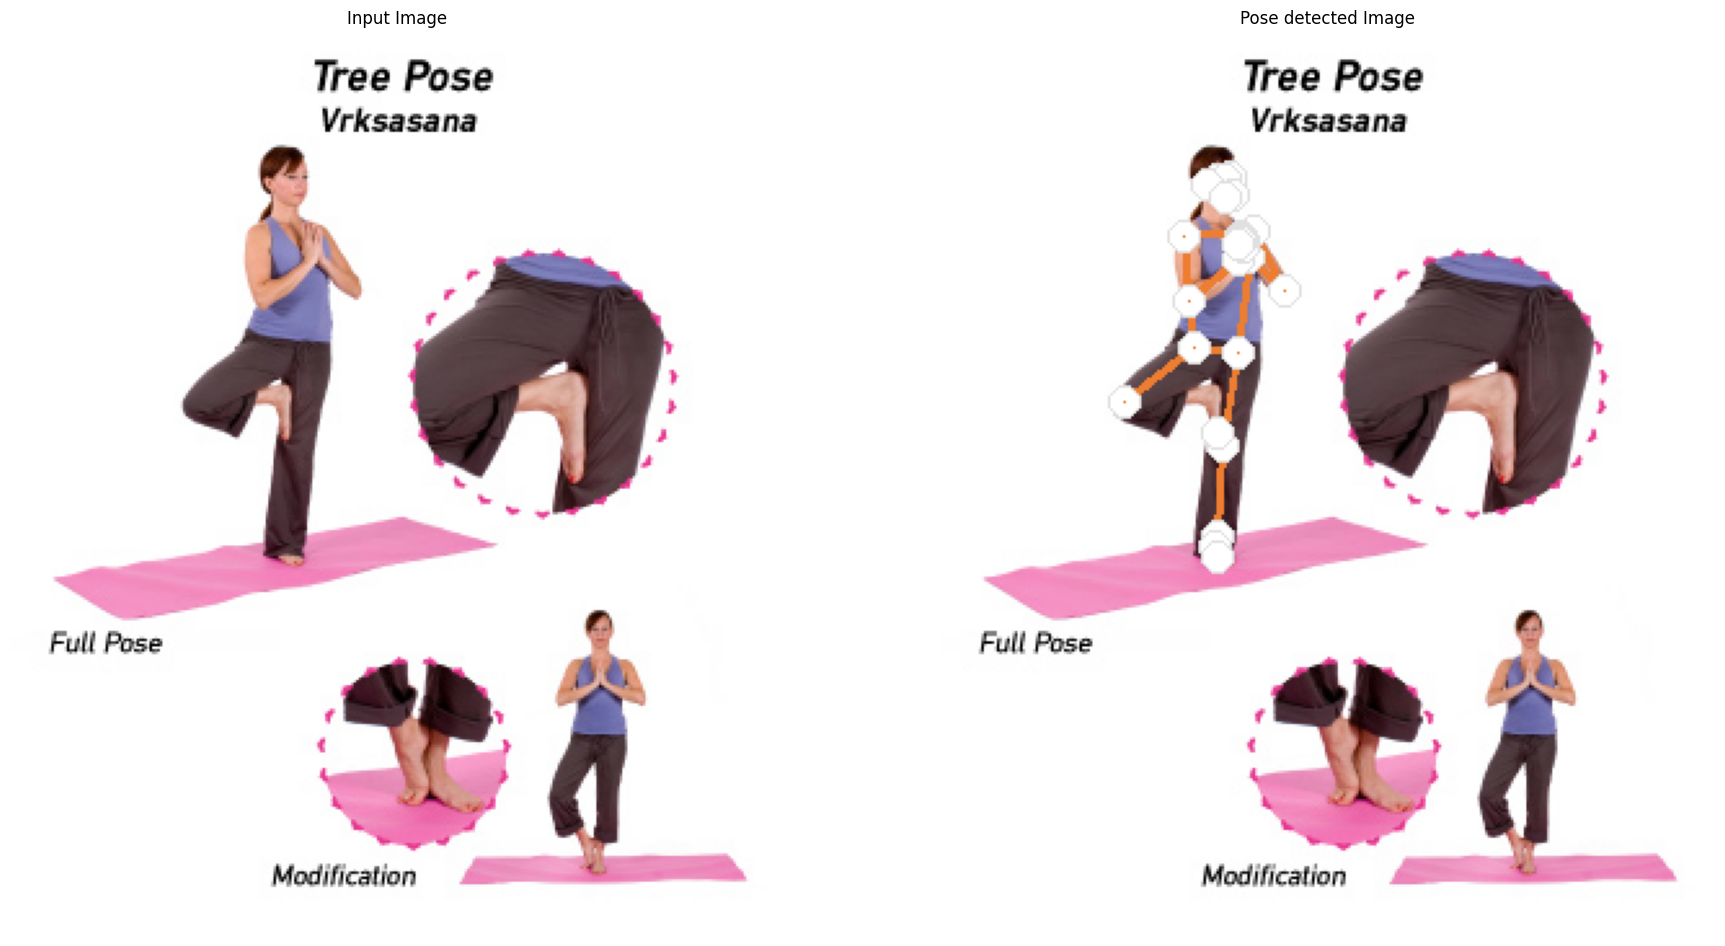

In [59]:
image_path = r'E:\Pose Detection\DATASET\TRAIN\tree\00000079.jpg'
output = cv2.imread(image_path)
detectPose(output, pose_image, draw=True, display=True)
cc = detectPose(output, pose_image, draw=True, display=False)
cc

In [74]:

path = os.chdir(r'E:\Pose Detection\DATASET\TEST\downdog')
for i in os.listdir():
    image_path = os.getcwd()+'\\'+i
    output = cv2.imread(image_path)
    x = detectPose(output, pose_image, draw=True, display=False)
    '''
    if len(x)!=132:
        print(i)
    '''
    with open(r'E:\\Pose Detection\\DATASET\\Numpy_files\\test\\downdog\\'+i+'.npy', 'wb') as f:
        np.save(f, x)
    
    
    
    


In [7]:
os.getcwd()

'E:\\Pose Detection\\DATASET\\TRAIN'

In [52]:
a = np.load(r'E:\Pose Detection\DATASET\numpy_files\plank\00000378.jpg.npy')

In [54]:
a

array([ 0.10238993,  0.5196839 , -0.01658777,  0.99992895,  0.10570282,
        0.49379662, -0.04764722,  0.99994457,  0.10870269,  0.49097151,
       -0.04771746,  0.99995089,  0.11193472,  0.48759797, -0.04782056,
        0.99995685,  0.10346493,  0.49353111,  0.00558203,  0.99990571,
        0.10499728,  0.49094397,  0.0056684 ,  0.99988723,  0.10699195,
        0.48759037,  0.0057469 ,  0.99991918,  0.13543943,  0.47978029,
       -0.11864565,  0.99993408,  0.13210866,  0.47735885,  0.11581144,
        0.99986541,  0.1207917 ,  0.53439271, -0.03749688,  0.99979359,
        0.11814499,  0.53362519,  0.03052489,  0.99978143,  0.22259374,
        0.55091155, -0.26655453,  0.99985468,  0.24517691,  0.52250183,
        0.29588643,  0.99805719,  0.26282629,  0.75360531, -0.24808046,
        0.98722559,  0.27622807,  0.70274514,  0.34433579,  0.22940041,
        0.15347856,  0.7483151 , -0.0889839 ,  0.97609568,  0.17145017,
        0.72789621,  0.26815364,  0.27385136,  0.12382901,  0.74